<a href="https://colab.research.google.com/github/madliners/training_and_hands-on/blob/main/Pamela_Rizqi_Maharani_1201220060_T_46_04_Studycase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
#Create class for graph visualization
class GraphVisualization:
  def __init__(self, graph):
    self.G = nx.Graph()
    self.graph = graph
    self.nodes = list(graph.keys())
  #Method for add edges
  def addEdge(self, a, b, weight):
    self.G.add_edge(a, b, weight=weight)

  #Method for visualize a graph
  def visualize(self):
    pos = nx.spring_layout(self.G)
    weights = nx.get_edge_attributes(self.G, "weight")

    self.G.add_nodes_from(self.nodes)
    plt.figure()
    nx.draw(self.G, pos, edge_color='black', width = 2, linewidths=2, node_size=600, node_color='purple', alpha=0.9, labels={node: node for node in self.G.nodes()})
    nx.draw_networkx_edge_labels(self.G, pos, edge_labels=weights)
    plt.axis('off')
    plt.show()

  #Visualize a graph
  def graph_visualize(self):
    for i in self.graph:
      for j in self.graph[i]:
        self.addEdge(i, j['v'], j['w'])

    self.visualize()

In [ ]:
#creating graph
graph = {
    'A': [{'v': 'B','w': 3}, {'v': 'C','w': 5}, {'v': 'D','w': 7}],
    'B': [{'v': 'A','w': 3}, {'v': 'C','w': 6}, {'v': 'E','w': 8}, {'v': 'F','w': 5}],
    'C': [{'v': 'A','w': 5}, {'v': 'B','w': 6}, {'v': 'D','w': 5}, {'v': 'G','w': 6}],
    'D': [{'v': 'A','w': 7}, {'v': 'C','w': 5}, {'v': 'E','w': 3}, {'v': 'F','w': 2}],
    'E': [{'v': 'B','w': 8}, {'v': 'D','w': 3}, {'v': 'F','w': 5}, {'v': 'G','w': 3}],
    'F': [{'v': 'B','w': 5}, {'v': 'D','w': 2}, {'v': 'E','w': 5}],
    'G': [{'v': 'C','w': 6}, {'v': 'E','w': 3}]
}

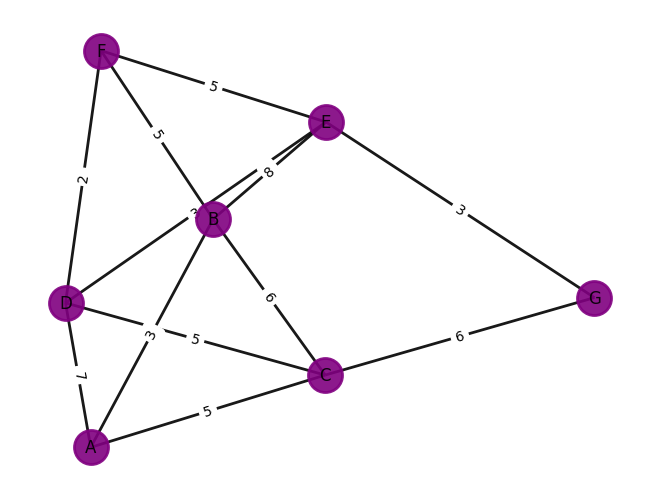

In [ ]:
#Visualize Graph
G = GraphVisualization(graph=graph)
G.graph_visualize()

In [ ]:
#Function for get path weight
def get_path_weight(path):
  path_weight = 0

  for index, value in enumerate(path):
    try:
      for j in graph[value]:
        if j['v'] == path[index + 1]:
          path_weight += j['w']
    except:
        break

  return path_weight

In [ ]:
from types import new_class
#Function to find the shortest path(dijkstra algorithm)
def find_shortest_path(graph, start, end, path =[]):
  path = path + [start]
  shortest = None
  weights = None

  if start == end: return path

  for node in graph[start]:
    if node['v'] not in path:
      newpath = find_shortest_path(graph, node['v'], end, path)
      if newpath:
        new_wexight= get_path_weight(newpath)
        if not weights or new_wexight < weight:
          shortest = newpath
          weight = new_wexight

  return shortest

In [ ]:
shortest_path = find_shortest_path(graph, 'A', 'G')
weight_shortest_path = get_path_weight(shortest_path)

print('Shortest path :', shortest_path)
print('Weight :', weight_shortest_path)


Shortest path : ['A', 'D', 'F', 'E', 'G']
Weight : 17


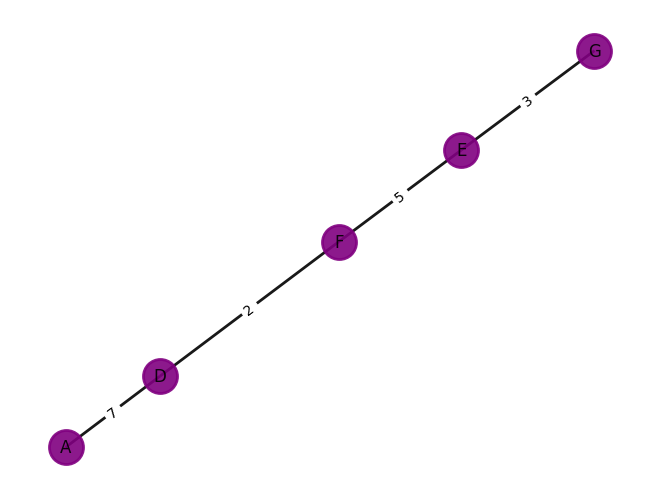

In [ ]:
shortest_graph = {}

#Generate shortest_graph
for index, value in enumerate(shortest_path):
  try:
    for j in graph[value]:
      if j['v'] == shortest_path[index + 1]:
        shortest_graph.update({value: [j]})
  except:
    break

#Visualize shortest path
S = GraphVisualization(shortest_graph)

for i in shortest_graph:
  for j in shortest_graph[i]:
    S.addEdge(i, j['v'], j['w'])

S.visualize()